<a href="https://colab.research.google.com/github/Rozaan3309/Colab-Citra-Digital/blob/main/citra_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

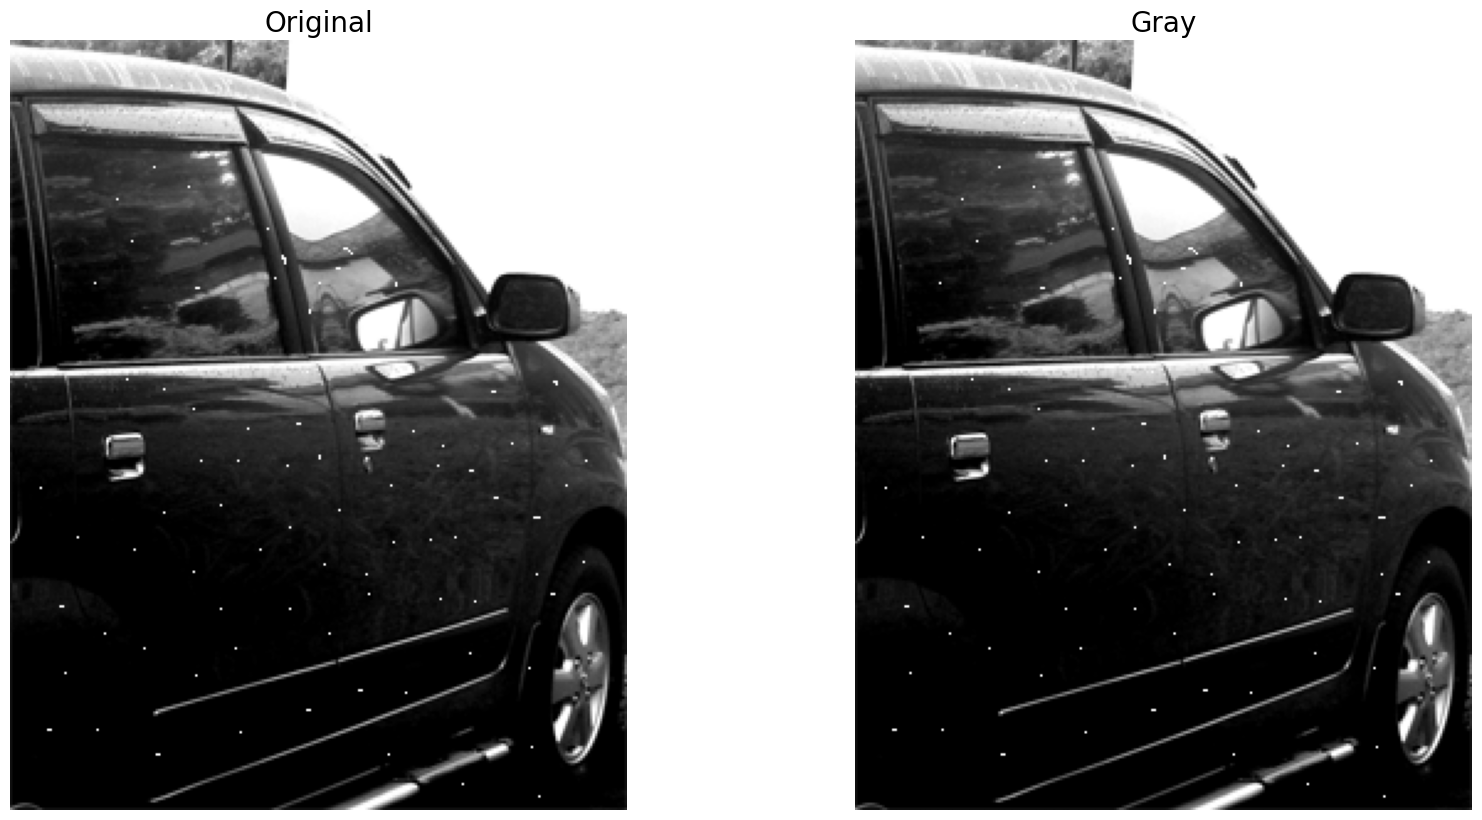

In [ ]:
import numpy as np #lib untuk pengolahan array/data numerik
import cv2     #lib untuk computer vision / pengolahan citra
import matplotlib.pylab as plt  #lib untuk menampilkan gambar / plot

I = cv2.imread('mobil.tif')
I_gray = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(I), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(122), plt.imshow(I_gray, cmap='gray'), plt.axis('off'), plt.title('Gray', size=20)
plt.show()

In [ ]:
def filter_batas(image):
  """
  Menerapkan filter batas (windowing) pada citra berdasarkan nilai min dan max citra.

  Args:
    image: Input citra grayscale.

  Returns:
    Citra hasil filter batas.
  """
  tinggi, lebar = image.shape
  G = image.copy()

  for baris in range(1, tinggi-1):
    for kolom in range(1, lebar-1):
      window = image[baris-1:baris+2, kolom-1:kolom+2]
      piksel_tetangga_9 = window.flatten()
      indeks_pusat = 4
      piksel_tetangga_8 = np.delete(piksel_tetangga_9, indeks_pusat)
      min_val = np.min(piksel_tetangga_8)
      max_val = np.max(piksel_tetangga_8)

      piksel_pusat = image[baris, kolom]
      if piksel_pusat < min_val:
        G[baris, kolom] = min_val
        # Jika piksel pusat lebih besar dari maks tetangga, setel ke maks tetangga.
      elif piksel_pusat > max_val:
            G[baris, kolom] = max_val
      # Jika di antara, pertahankan nilai asli.
      else:
        G[baris, kolom] = piksel_pusat
  return G

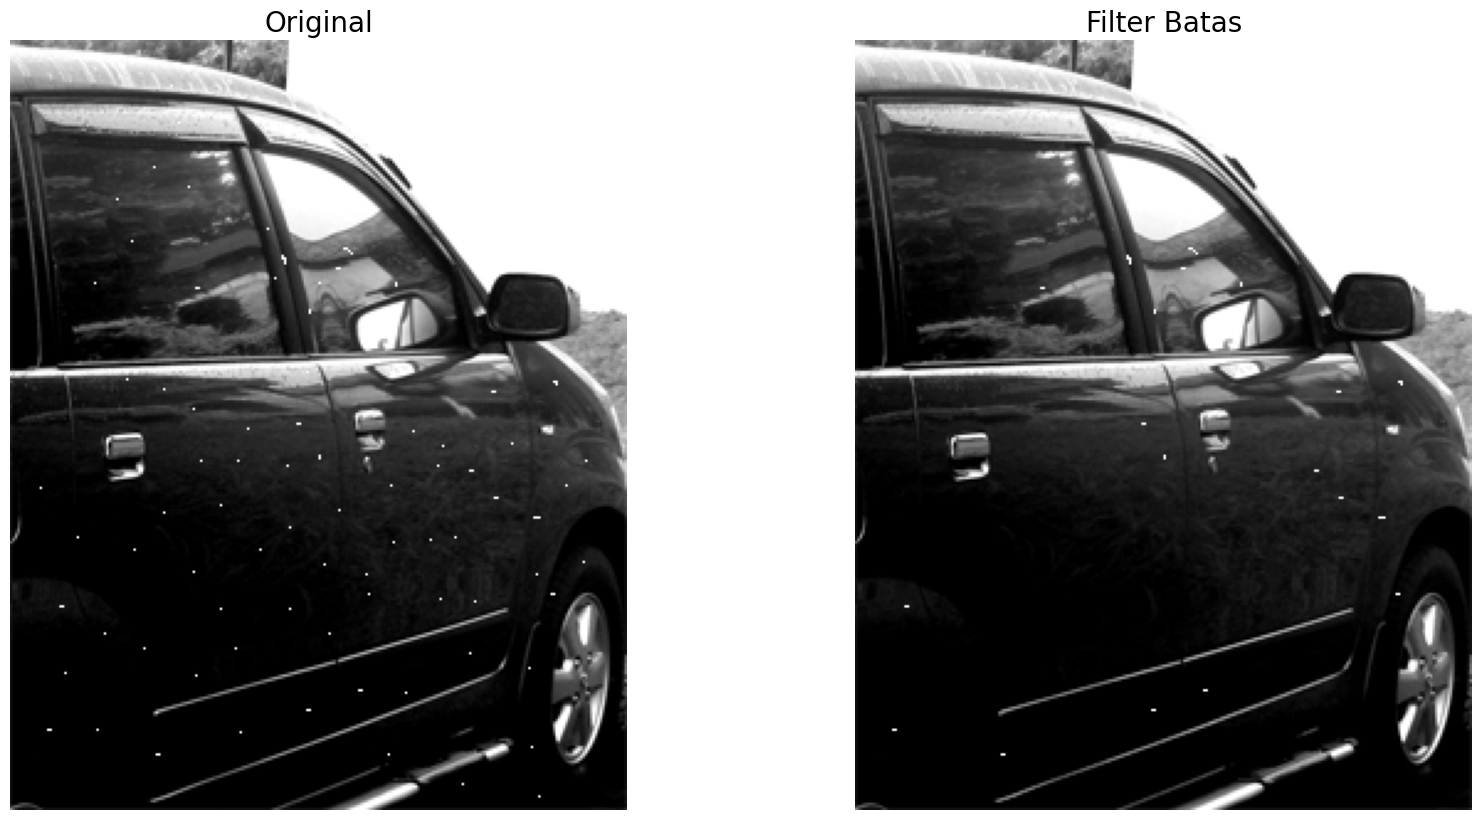

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(I_gray, cmap='gray'), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(122), plt.imshow(filter_batas(I_gray), cmap='gray'), plt.axis('off'), plt.title('Filter Batas', size=20)
plt.show()

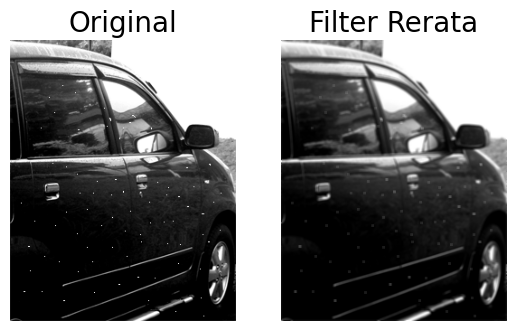

In [ ]:
def filter_rerata(image):
  """
  Menerapkan filter rerata (mean filter) pada citra.

  Args:
    image: Input citra grayscale.

  Returns:
    Citra hasil filter rerata.
  """
  tinggi, lebar = image.shape
  filtered_image = image.copy()

  for baris in range(1, tinggi - 1):
    for kolom in range(1, lebar - 1):
      # Ambil window 3x3
      window = image[baris-1:baris+2, kolom-1:kolom+2]
      # Hitung nilai rata-rata piksel dalam window
      rerata_piksel = np.mean(window)
      # Ganti piksel pusat dengan nilai rata-rata
      filtered_image[baris, kolom] = rerata_piksel

  return filtered_image

  plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(I_gray, cmap='gray'), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(122), plt.imshow(filter_rerata(I_gray), cmap='gray'), plt.axis('off'), plt.title('Filter Rerata', size=20)
plt.show()

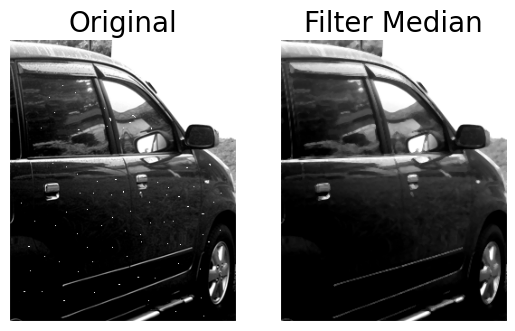

In [ ]:
def filter_median(image):
  """
  Menerapkan filter median pada citra.

  Args:
    image: Input citra grayscale.

  Returns:
    Citra hasil filter median.
  """
  tinggi, lebar = image.shape
  filtered_image = image.copy()

  for baris in range(1, tinggi - 1):
    for kolom in range(1, lebar - 1):
      # Ambil window 3x3
      window = image[baris-1:baris+2, kolom-1:kolom+2]
      # Hitung nilai median piksel dalam window
      median_piksel = np.median(window)
      # Ganti piksel pusat dengan nilai median
      filtered_image[baris, kolom] = median_piksel

  return filtered_image

  plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(I_gray, cmap='gray'), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(122), plt.imshow(filter_median(I_gray), cmap='gray'), plt.axis('off'), plt.title('Filter Median', size=20)
plt.show()

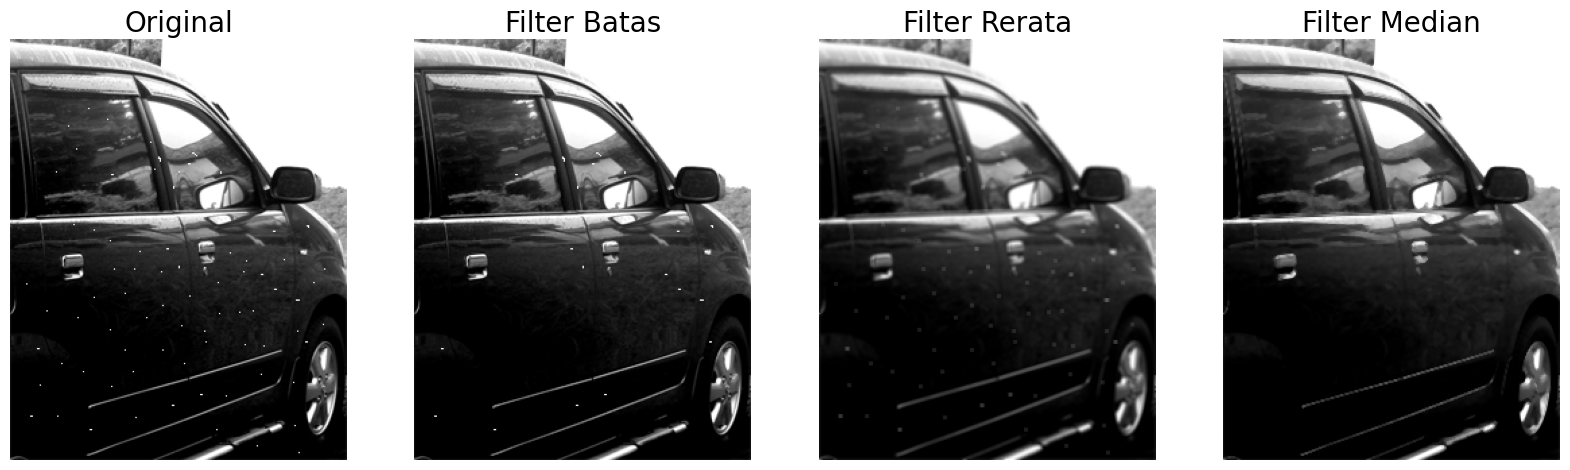

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(I_gray, cmap='gray'), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(142), plt.imshow(filter_batas(I_gray), cmap='gray'), plt.axis('off'), plt.title('Filter Batas', size=20)
plt.subplot(143), plt.imshow(filter_rerata(I_gray), cmap='gray'), plt.axis('off'), plt.title('Filter Rerata', size=20)
plt.subplot(144), plt.imshow(filter_median(I_gray), cmap='gray'), plt.axis('off'), plt.title('Filter Median', size=20)
plt.show()

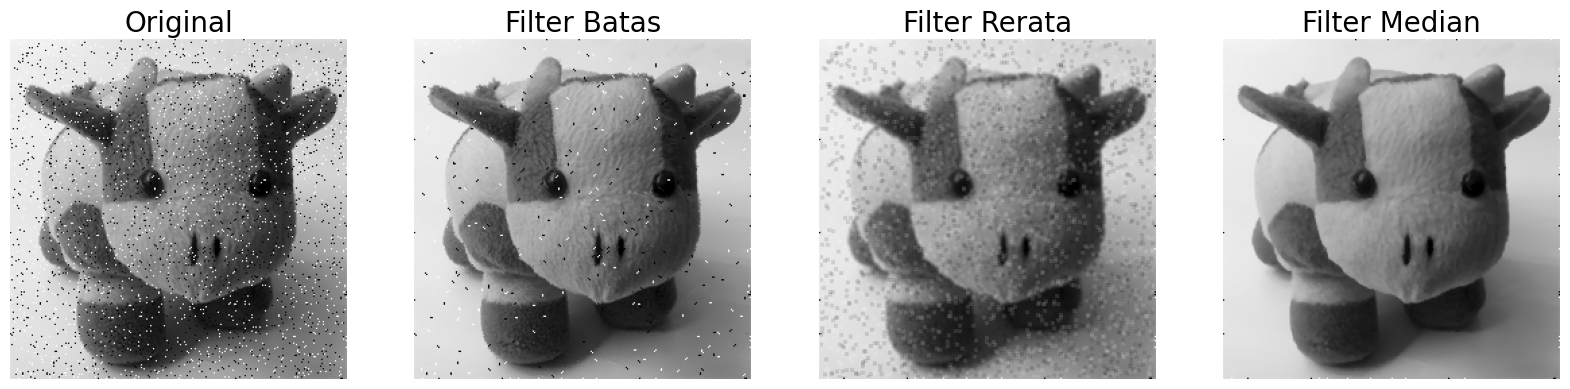

In [ ]:
J = cv2.imread('boneka2.tif')
J_gray = cv2.cvtColor(J, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(J_gray, cmap='gray'), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(142), plt.imshow(filter_batas(J_gray), cmap='gray'), plt.axis('off'), plt.title('Filter Batas', size=20)
plt.subplot(143), plt.imshow(filter_rerata(J_gray), cmap='gray'), plt.axis('off'), plt.title('Filter Rerata', size=20)
plt.subplot(144), plt.imshow(filter_median(J_gray), cmap='gray'), plt.axis('off'), plt.title('Filter Median', size=20)
plt.show()

In [ ]:
def filter_kernel(image, kernel):
  """
  Menerapkan filter kernel 3x3 pada citra.

  Args:
    image: Input citra grayscale.
    kernel: Kernel 3x3 yang digunakan untuk filtering.

  Returns:
    Citra hasil filtering.
  """
  tinggi, lebar = image.shape
  filtered_image = np.copy(image)

  for baris in range(1, tinggi - 1):
    for kolom in range(1, lebar - 1):
      # Ambil window 3x3
      window = image[baris-1:baris+2, kolom-1:kolom+2]
      # Lakukan konvolusi
      filtered_pixel = np.sum(window * kernel)
      # Ganti piksel pusat dengan hasil konvolusi
      filtered_image[baris, kolom] = filtered_pixel

  return filtered_image

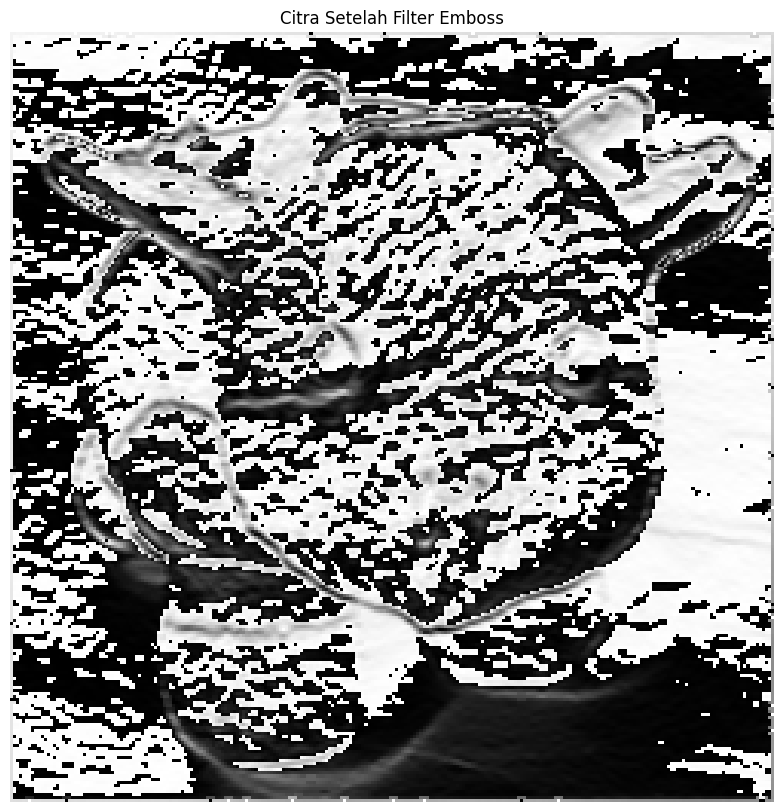

In [ ]:
J_clean = filter_median(J_gray)

# Definisikan kernel emboss
kernel_emboss = np.array([[-1, -1, -1],
                          [0,  0, 0],
                          [1,  1, 1]])

# Terapkan filter kernel dengan kernel emboss pada citra I_gray
I_emboss = filter_kernel(J_clean, kernel_emboss)

# Tampilkan citra hasil emboss
plt.figure(figsize=(10,10))
plt.imshow(I_emboss, cmap='gray')
plt.axis('off')
plt.title('Citra Setelah Filter Emboss')
plt.show()